# **Survival of the FITtest**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Get  Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
X = data.data
y = data.target

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Reference: stackoverflow.com/questions/50796024/
# Applying PCA
from sklearn.decomposition import PCA
model = PCA(n_components=5).fit(X_train)
X_pc = model.transform(X_train)
n_pcs= model.components_.shape[0]
# max correlation on each principal component
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
feature_names = list(range(X_train.shape[1]))
important_names = [feature_names[most_important[i]] for i in range(n_pcs)]

# print
dic = {'PC{}'.format(i): important_names[i] for i in range(n_pcs)}

dic

{'PC0': 7, 'PC1': 9, 'PC2': 11, 'PC3': 21, 'PC4': 4}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA scree plot')

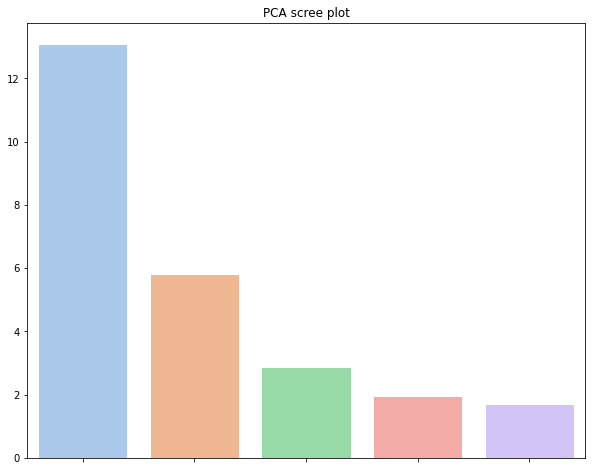

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set_theme(style="whitegrid", palette="pastel")
g = sns.barplot([x for x in range(n_pcs)], model.explained_variance_, ax=ax)
g.set_xticklabels([])
sns.set_style("whitegrid")
g.set_title("PCA scree plot")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
importance = classifier.feature_importances_
# summarize importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot importance



In [ ]:
type(importance)

numpy.ndarray

In [ ]:
n = 5
indices = (-importance).argsort()[:n]
print(indices)

[23 22 27  7  2]


In [ ]:
 important_names

[7, 9, 11, 21, 4]

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
X_train.shape

(512, 30)

In [ ]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print(X_train.shape, acc_score)

(512, 30) 0.9824561403508771


In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train[:, important_names], y_train)
y_pred = classifier.predict(X_test[:, important_names])
acc_score = accuracy_score(y_test, y_pred)
print(X_train[:, important_names].shape, acc_score)

(512, 5) 0.9298245614035088
